**Tests for task (d)**

In [1]:
from imports import *
from classes import NeuralNetwork, GradientDescent
from functions import *
import classes
import functions
import imports
import importlib

importlib.reload(classes) 
importlib.reload(functions)
importlib.reload(imports)

<module 'imports' from 'c:\\Users\\kdoug\\OneDrive\\Documents\\UiO\\Høst 2025\\FYS-STK4155\\Project-2\\Code\\imports.py'>

First, we look at the MSE as a function of network depth and number of nodes for the sigmoid activation in all layers. 

Layers: 1 and nodes: 1 with time: 2.10 s, and MSE: 8.75e-02
Layers: 1 and nodes: 5 with time: 2.12 s, and MSE: 1.19e-02
Layers: 1 and nodes: 10 with time: 2.08 s, and MSE: 1.15e-02
Layers: 1 and nodes: 50 with time: 2.67 s, and MSE: 1.96e-02
Layers: 1 and nodes: 100 with time: 4.01 s, and MSE: 1.40e-02
Layers: 2 and nodes: 1 with time: 1.72 s, and MSE: 8.75e-02
Layers: 2 and nodes: 5 with time: 1.52 s, and MSE: 1.05e-02
Layers: 2 and nodes: 10 with time: 1.65 s, and MSE: 1.11e-02
Layers: 2 and nodes: 50 with time: 5.60 s, and MSE: 1.15e-02
Layers: 2 and nodes: 100 with time: 11.11 s, and MSE: 1.05e-02
Layers: 3 and nodes: 1 with time: 2.59 s, and MSE: 8.76e-02
Layers: 3 and nodes: 5 with time: 1.92 s, and MSE: 1.05e-02
Layers: 3 and nodes: 10 with time: 1.96 s, and MSE: 1.02e-02
Layers: 3 and nodes: 50 with time: 7.23 s, and MSE: 1.17e-02
Layers: 3 and nodes: 100 with time: 12.93 s, and MSE: 2.15e-02
Layers: 4 and nodes: 1 with time: 1.79 s, and MSE: 8.76e-02
Layers: 4 and nodes: 5 wit

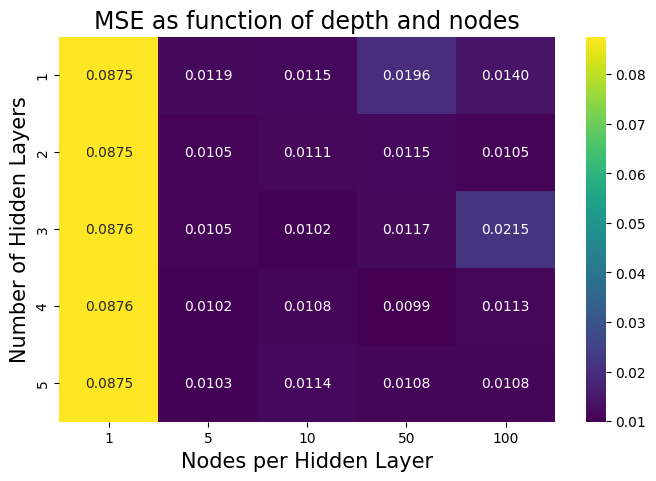

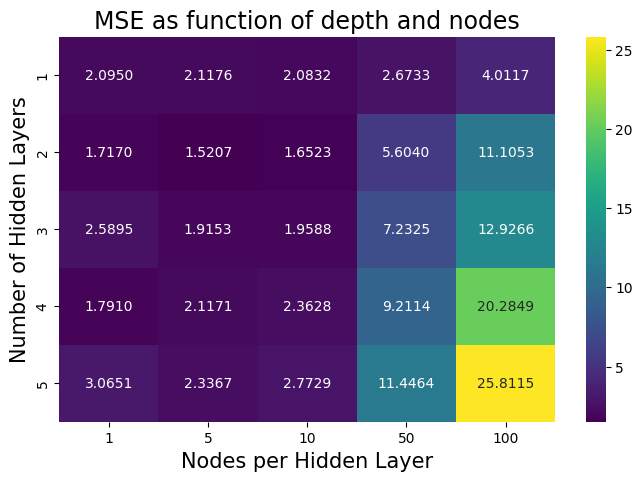

In [5]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(n=100, noise_std=0.1)

activation_funcs = [sigmoid, reLU, leaky_reLU]
activation_ders  = [sigmoid_der, reLU, leaky_reLU]
nodes_list = [1,5,10,50,100]
hidden_layers = [1,2,3,4,5]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))
timeMatrix = np.empty(mseMatrix.shape)

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):

        start = time.perf_counter()

        LinReg = NeuralNetwork(1, [nodes]*hidden_layer + [1], [sigmoid]*(hidden_layer) + [identity], [sigmoid_der]*(hidden_layer)+[identity_der], mse, mse_der)
        LinReg.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
        y_pred = LinReg.feed_forward(X_train)
        mseMatrix[h, n] = format(mse(y_pred, y_train), '.2e')

        end = time.perf_counter()
        time_iter = end - start
        timeMatrix[h,n] = time_iter

        print(f"Layers: {hidden_layer} and nodes: {nodes} with time: {time_iter:.2f} s, and MSE: {format(mseMatrix[h,n],'.2e')}")

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(mseMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)
save_path = os.path.join(save_dir, "HM_d_MSE.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')


fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(timeMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)
save_path = os.path.join(save_dir, "HM_d_complexity.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')




Do the same tests but reLU as activation in hidden layers

In [6]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(n=100, noise_std=0.2)

activation_funcs = [sigmoid, reLU, leaky_reLU]
activation_ders  = [sigmoid_der, reLU, leaky_reLU]
nodes_list = [1,5,10,50,100]
hidden_layers = [1,2,3,4,5]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))
timeMatrix = np.empty(mseMatrix.shape)

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):

        start = time.perf_counter()

        LinReg = NeuralNetwork(1, [nodes]*hidden_layer + [1], [reLU]*(hidden_layer) + [identity], [ReLU_der]*(hidden_layer)+[identity_der], mse, mse_der)
        LinReg.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
        y_pred = LinReg.feed_forward(X_test)
        mseMatrix[h, n] = format(mse(y_pred, y_test), '.2e')

        end = time.perf_counter()
        time_iter = end - start
        timeMatrix[h,n] = time_iter

        print(f"Layers: {hidden_layer} and nodes: {nodes} with time: {time_iter:.2f} s, and MSE: {format(mseMatrix[h,n], '.2e')}")

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(mseMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)
save_path = os.path.join(save_dir, "HM_d_MSETest_reLU.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

SyntaxError: f-string: unmatched '(' (2970941440.py, line 24)

Even with a relatively high noise, we do not get any noticable overfitting with the chosen parameter set

Why do we see so many equal numbers, deviating greately from the rest (purple ones)? Vanishing/exploding gradients?

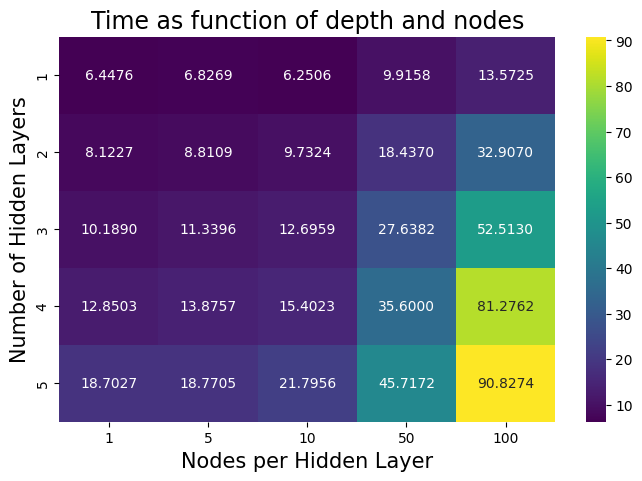

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(timeMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("Time as function of depth and nodes", fontsize=17)
save_path = os.path.join(save_dir, "HM_d_complexity.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

Layers: 1 and nodes: 1 with time: 6.69 s
Layers: 1 and nodes: 5 with time: 7.58 s
Layers: 1 and nodes: 10 with time: 8.29 s
Layers: 1 and nodes: 50 with time: 11.33 s
Layers: 2 and nodes: 1 with time: 8.10 s
Layers: 2 and nodes: 5 with time: 10.68 s
Layers: 2 and nodes: 10 with time: 9.99 s
Layers: 2 and nodes: 50 with time: 19.84 s
Layers: 3 and nodes: 1 with time: 10.50 s
Layers: 3 and nodes: 5 with time: 11.93 s
Layers: 3 and nodes: 10 with time: 20.62 s
Layers: 3 and nodes: 50 with time: 83.53 s
Layers: 4 and nodes: 1 with time: 13.99 s
Layers: 4 and nodes: 5 with time: 14.36 s
Layers: 4 and nodes: 10 with time: 15.31 s
Layers: 4 and nodes: 50 with time: 97.92 s


Text(0.5, 1.0, 'MSE as function of depth and nodes')

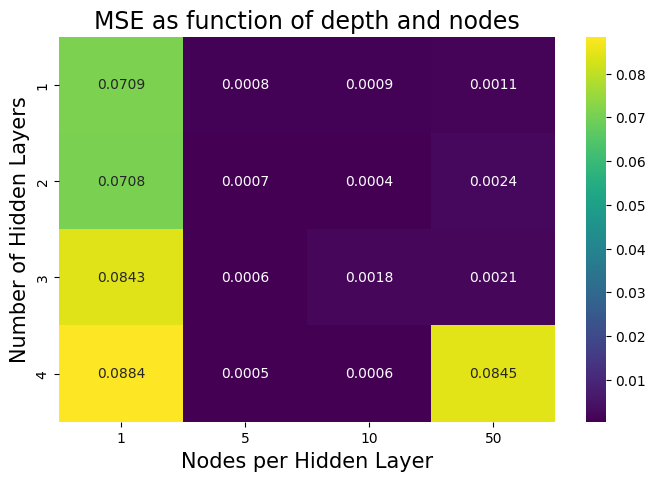

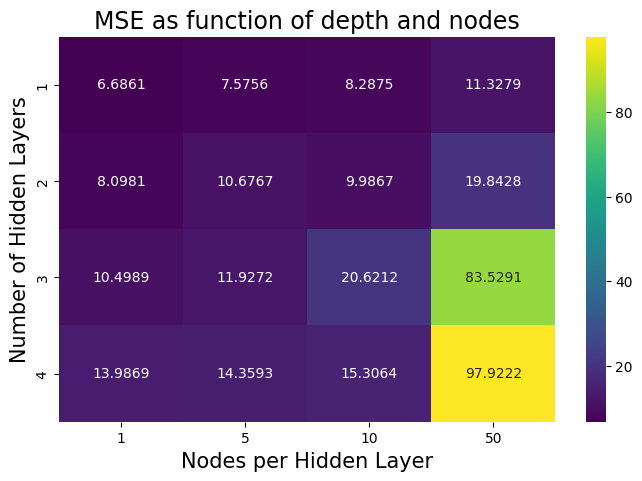

In [ ]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data()

activation_funcs = [sigmoid, reLU, leaky_reLU]
activation_ders  = [sigmoid_der, reLU, leaky_reLU]
nodes_list = [1,5,10]
hidden_layers = [1,2,3]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))
timeMatrix = np.empty(mseMatrix.shape)

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):

        start = time.perf_counter()

        LinReg = NeuralNetwork(1, [nodes]*hidden_layer + [1], [sigmoid]*(hidden_layer+1), [sigmoid_der]*(hidden_layer+1), mse, mse_der)
        LinReg.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.1, functional=NN_ADAM)
        y_pred = LinReg.feed_forward(X_test)
        mseMatrix[h, n] = mse(y_pred, y_test)

        end = time.perf_counter()
        time_iter = end - start
        timeMatrix[h,n] = time_iter

        print(f"Layers: {hidden_layer} and nodes: {nodes} with time: {time_iter:.2f} s")


fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(mseMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)


fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(timeMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)


Testing for other activation functions, but the same activation for hidden and output

In [7]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data()

activation_funcs = [sigmoid, reLU, leaky_reLU, identity]
activation_ders  = [sigmoid_der, reLU, leaky_reLU, identity_der]
nodes_list = [1,5,10,20]
hidden_layers = [1,2,3,4]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):
        for i in range(len(activation_funcs)):


            #a = random.randint(0,len(activation_funcs)-1) # Draws two unique activation functions.

            act = activation_funcs[i]
            act_der  = activation_ders[i]

            LinReg = NeuralNetwork(1, [nodes]*hidden_layer + [1], [act]*(hidden_layer+1), [act_der]*(hidden_layer+1), mse, mse_der)
            LinReg.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.1, functional=NN_ADAM)
            y_pred = LinReg.feed_forward(X_test)
            mseMatrix[h, n] = format(mse(y_pred, y_test), '.2e')

            print(f"Activation function: {act.__name__} with MSE: {mseMatrix[h,n]} w hl: {hidden_layer}, nodes: {nodes}")



Activation function: sigmoid with MSE: 0.0711 w hl: 1, nodes: 1
Activation function: reLU with MSE: 0.0706 w hl: 1, nodes: 1
Activation function: leaky_reLU with MSE: 1390.0 w hl: 1, nodes: 1
Activation function: identity with MSE: 0.088 w hl: 1, nodes: 1
Activation function: sigmoid with MSE: 0.000861 w hl: 1, nodes: 5
Activation function: reLU with MSE: 0.168 w hl: 1, nodes: 5
Activation function: leaky_reLU with MSE: 832.0 w hl: 1, nodes: 5
Activation function: identity with MSE: 0.0853 w hl: 1, nodes: 5
Activation function: sigmoid with MSE: 0.000826 w hl: 1, nodes: 10
Activation function: reLU with MSE: 0.168 w hl: 1, nodes: 10
Activation function: leaky_reLU with MSE: 79500.0 w hl: 1, nodes: 10
Activation function: identity with MSE: 0.0847 w hl: 1, nodes: 10
Activation function: sigmoid with MSE: 0.00139 w hl: 1, nodes: 20
Activation function: reLU with MSE: 0.00731 w hl: 1, nodes: 20
Activation function: leaky_reLU with MSE: 371000.0 w hl: 1, nodes: 20
Activation function: iden

MSE Values for the leaky reLU gets ridicuously high. Assume that it's a problem having these as activation functions when trying to force the output between 0 and 1. Sigmoid and identity works well for this

Testing for the same activation function across all hidden layers, but with identity output activation. Trying to see if ReLU performs good in the hidden layers with sigmoid activation.

In [8]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data()

def GELU(x):
    return 0.5*x *(1+tanh(np.sqrt(2/np.pi)*(x+0.044715*(x**3)))) 
def ELU(x, alpha=0.01):
    return np.where(x < 0, alpha*(np.exp(x)-1), x)


def ELU_der(x, alpha=0.01):
    return np.where(x<0, ELU(x) + alpha, 1)

from scipy.special import erf
def GELU_der(x):
    return 0.5 * (1 + erf(x / np.sqrt(2))) + (x * np.exp(-x**2 / 2)) / np.sqrt(2 * np.pi)
def tanh(x):
    return np.tanh(x)


def tanh_der(x):
    return 1.0 - np.tanh(x)**2

activation_funcs = [reLU, leaky_reLU, ELU, tanh, GELU, identity, sigmoid]
activation_ders  = [reLU, leaky_reLU,ELU, tanh, GELU,  identity_der, sigmoid_der]
nodes_list = [1,5,10,20]
hidden_layers = [1,2,3,4]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):
        for i in range(len(activation_funcs)):


            activationHidden = activation_funcs[i]
            activationHidden_der  = activation_ders[i]

            LinReg = NeuralNetwork(1, [nodes]*hidden_layer + [1], [activationHidden]*(hidden_layer) + [identity], [activationHidden_der]*(hidden_layer) + [identity_der], mse, mse_der)
            LinReg.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.1, functional=NN_ADAM)
            y_pred = LinReg.feed_forward(X_test)
            mseMatrix[h, n] = format(mse(y_pred, y_test), '.2e')


            print(f"Hidden act: {activationHidden.__name__}, output act: identity, with MSE: {mseMatrix[h,n]} w hl: {hidden_layer}, nodes: {nodes}")




Hidden act: reLU, output act: identity, with MSE: 0.0843 w hl: 1, nodes: 1
Hidden act: leaky_reLU, output act: identity, with MSE: 0.0845 w hl: 1, nodes: 1
Hidden act: ELU, output act: identity, with MSE: 0.0722 w hl: 1, nodes: 1
Hidden act: tanh, output act: identity, with MSE: 0.0802 w hl: 1, nodes: 1
Hidden act: GELU, output act: identity, with MSE: 0.0739 w hl: 1, nodes: 1
Hidden act: identity, output act: identity, with MSE: 0.0847 w hl: 1, nodes: 1
Hidden act: sigmoid, output act: identity, with MSE: 0.0726 w hl: 1, nodes: 1
Hidden act: reLU, output act: identity, with MSE: 0.0226 w hl: 1, nodes: 5
Hidden act: leaky_reLU, output act: identity, with MSE: 0.0228 w hl: 1, nodes: 5
Hidden act: ELU, output act: identity, with MSE: 0.0714 w hl: 1, nodes: 5
Hidden act: tanh, output act: identity, with MSE: 0.0776 w hl: 1, nodes: 5
Hidden act: GELU, output act: identity, with MSE: 0.0114 w hl: 1, nodes: 5
Hidden act: identity, output act: identity, with MSE: 0.0857 w hl: 1, nodes: 5
Hidd

Same as for first test, but with reLU in all layers

Layers: 1 and nodes: 1 with time: 2.00 s
Layers: 1 and nodes: 5 with time: 1.95 s
Layers: 1 and nodes: 10 with time: 1.35 s
Layers: 1 and nodes: 50 with time: 2.05 s
Layers: 1 and nodes: 100 with time: 2.42 s
Layers: 2 and nodes: 1 with time: 1.64 s
Layers: 2 and nodes: 5 with time: 1.51 s
Layers: 2 and nodes: 10 with time: 1.46 s
Layers: 2 and nodes: 50 with time: 3.26 s
Layers: 2 and nodes: 100 with time: 7.21 s
Layers: 3 and nodes: 1 with time: 2.53 s
Layers: 3 and nodes: 5 with time: 2.28 s
Layers: 3 and nodes: 10 with time: 1.66 s
Layers: 3 and nodes: 50 with time: 4.69 s
Layers: 3 and nodes: 100 with time: 10.64 s
Layers: 4 and nodes: 1 with time: 2.70 s
Layers: 4 and nodes: 5 with time: 2.46 s
Layers: 4 and nodes: 10 with time: 1.88 s
Layers: 4 and nodes: 50 with time: 6.29 s
Layers: 4 and nodes: 100 with time: 13.81 s
Layers: 5 and nodes: 1 with time: 3.05 s
Layers: 5 and nodes: 5 with time: 2.63 s
Layers: 5 and nodes: 10 with time: 2.13 s
Layers: 5 and nodes: 50 with time: 7.3

Text(0.5, 1.0, 'MSE as function of depth and nodes')

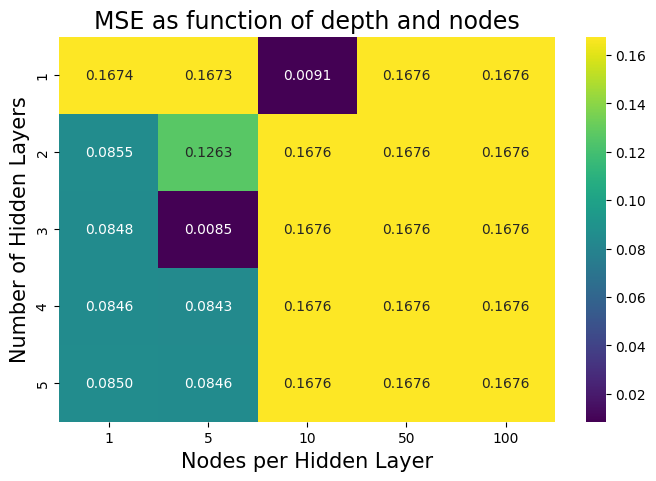

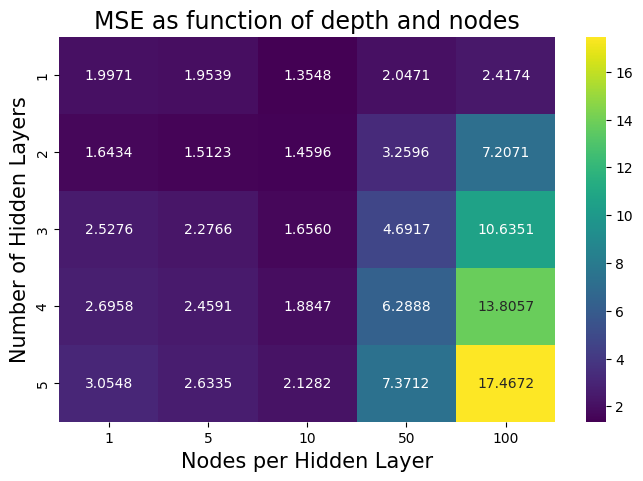

In [9]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data()

activation_funcs = [sigmoid, reLU, leaky_reLU]
activation_ders  = [sigmoid_der, reLU, leaky_reLU]
nodes_list = [1,5,10,50,100]
hidden_layers = [1,2,3,4,5]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))
timeMatrix = np.empty(mseMatrix.shape)

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):

        start = time.perf_counter()

        LinReg = NeuralNetwork(1, [nodes]*hidden_layer + [1], [reLU]*(hidden_layer+1), [reLU]*(hidden_layer+1), mse, mse_der)
        LinReg.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
        y_pred = LinReg.feed_forward(X_test)
        mseMatrix[h, n] = mse(y_pred, y_test)

        end = time.perf_counter()
        time_iter = end - start
        timeMatrix[h,n] = time_iter

        print(f"Layers: {hidden_layer} and nodes: {nodes} with time: {time_iter:.2f} s")

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(mseMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(timeMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)

Looking for overfitting

Train MSE:  0.0224
Test MSE:  0.0401


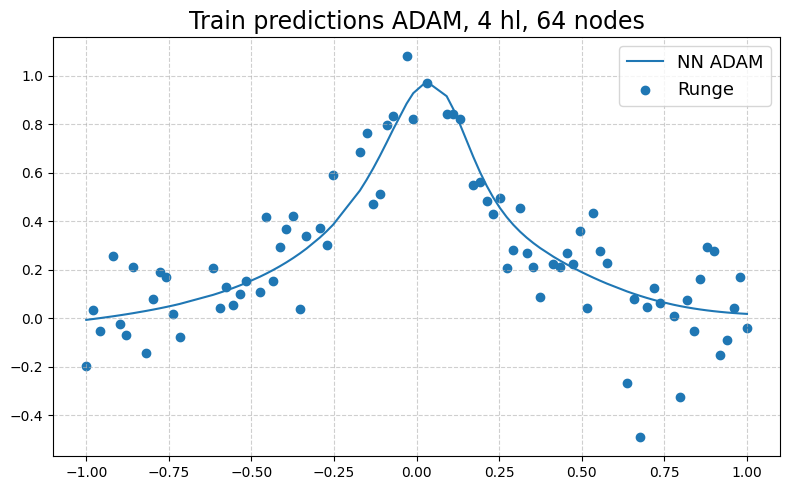

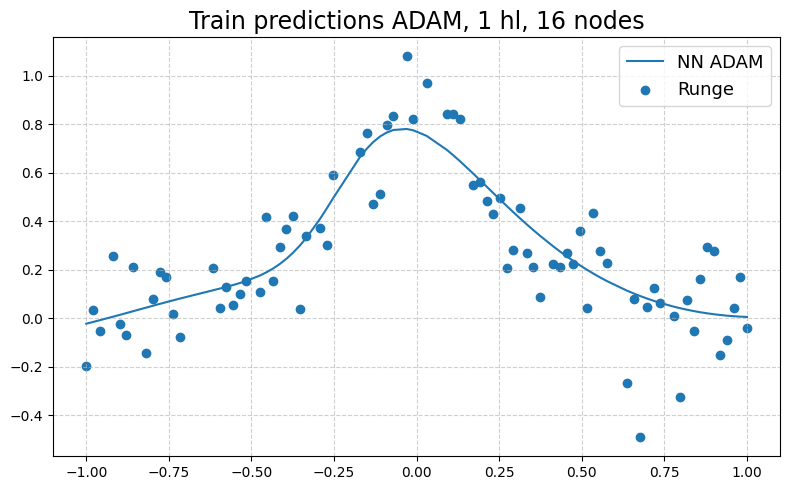

In [4]:
state=50
datapoints=100
noise_std=0.15

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, n=datapoints, noise_std=noise_std)
hidden = 4
node_size = 64
hidden_act = sigmoid
hidden_der = sigmoid_der

LinReg = NeuralNetwork(1, 
                       [node_size]*hidden + [1], 
                       [hidden_act]*hidden + [identity], 
                       [hidden_der]*hidden + [identity_der], mse, mse_der)
LinReg.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
y_pred = LinReg.feed_forward(X_train)
test_pred = LinReg.feed_forward(X_test)
print("Train MSE: ", round(mse(y_pred, y_train),4))
print("Test MSE: ", round(mse(test_pred, y_test),4))

hidden = 1
node_size = 16
hidden_act = sigmoid
hidden_der = sigmoid_der

LinReg2 = NeuralNetwork(1, 
                       [node_size]*hidden + [1], 
                       [hidden_act]*hidden + [identity], 
                       [hidden_der]*hidden + [identity_der], mse, mse_der)
LinReg2.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
y_pred2 = LinReg2.feed_forward(X_train)


sort_indices = np.argsort(x_train.flatten())

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_train[sort_indices], y_pred[sort_indices], label="NN ADAM")
ax.scatter(x_train[sort_indices], y_train[sort_indices], label="Runge")

ax.set_title("Train predictions ADAM, 4 hl, 64 nodes", fontsize=17)
ax.legend(fontsize=13)
ax.grid(True, linestyle="--", alpha=0.6)
fig.tight_layout()

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_train[sort_indices], y_pred2[sort_indices], label="NN ADAM")
ax.scatter(x_train[sort_indices], y_train[sort_indices], label="Runge")

ax.set_title("Train predictions ADAM, 1 hl, 16 nodes", fontsize=17)
ax.legend(fontsize=13)
ax.grid(True, linestyle="--", alpha=0.6)
fig.tight_layout()



Regularization with L2

Train MSE:  0.0306
Test MSE:  0.0507


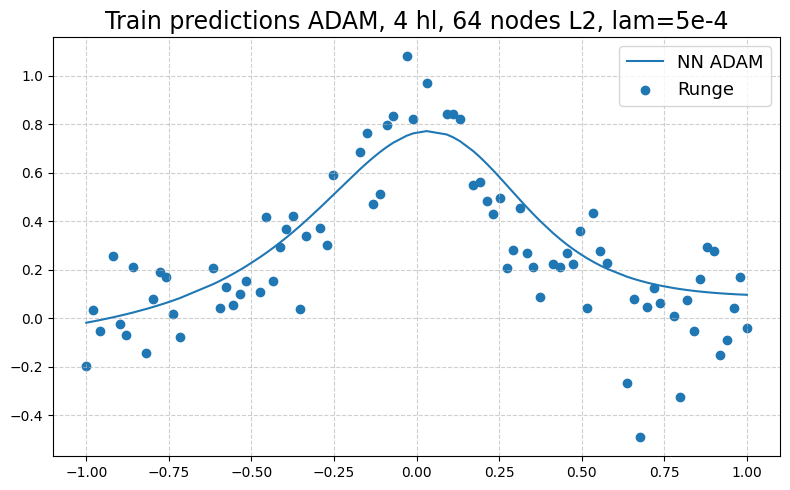

In [6]:
state=50
datapoints=100
noise_std=0.15

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, n=datapoints, noise_std=noise_std)
hidden = 4
node_size = 64
hidden_act = sigmoid
hidden_der = sigmoid_der

LinRegL2 = NeuralNetwork(1, 
                       [node_size]*hidden + [1], 
                       [hidden_act]*hidden + [identity], 
                       [hidden_der]*hidden + [identity_der], mse, mse_der, l2=True, lam=5e-4)
LinRegL2.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
y_predL2 = LinRegL2.feed_forward(X_train)
test_predL2 = LinRegL2.feed_forward(X_test)
print("Train MSE: ", round(mse(y_predL2, y_train),4))
print("Test MSE: ", round(mse(test_predL2, y_test),4))

sort_indices = np.argsort(x_train.flatten())

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_train[sort_indices], y_predL2[sort_indices], label="NN ADAM")
ax.scatter(x_train[sort_indices], y_train[sort_indices], label="Runge")

ax.set_title("Train predictions ADAM, 4 hl, 64 nodes L2, lam=5e-4", fontsize=17)
ax.legend(fontsize=13)
ax.grid(True, linestyle="--", alpha=0.6)
fig.tight_layout()


Regularization with L1

Train MSE:  0.04
Test MSE:  0.0725


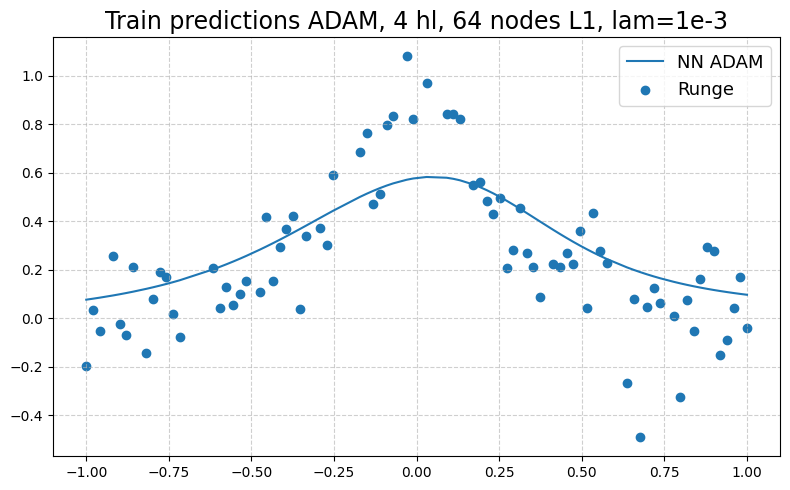

In [7]:
state=50
datapoints=100
noise_std=0.15

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, n=datapoints, noise_std=noise_std)
hidden = 4
node_size = 64
hidden_act = sigmoid
hidden_der = sigmoid_der

LinRegL1 = NeuralNetwork(1, 
                       [node_size]*hidden + [1], 
                       [hidden_act]*hidden + [identity], 
                       [hidden_der]*hidden + [identity_der], mse, mse_der, l1=True, lam=1e-3)
LinRegL1.train_SGD_v2(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
y_predL1 = LinRegL1.feed_forward(X_train)
test_predL1 = LinRegL1.feed_forward(X_test)
print("Train MSE: ", round(mse(y_predL1, y_train),4))
print("Test MSE: ", round(mse(test_predL1, y_test),4))

sort_indices = np.argsort(x_train.flatten())

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_train[sort_indices], y_predL1[sort_indices], label="NN ADAM")
ax.scatter(x_train[sort_indices], y_train[sort_indices], label="Runge")

ax.set_title("Train predictions ADAM, 4 hl, 64 nodes L1, lam=1e-3", fontsize=17)
ax.legend(fontsize=13)
ax.grid(True, linestyle="--", alpha=0.6)
fig.tight_layout()